In [1]:
import pandas as pd
import plotly.express as px
import folium, json
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

## [인구밀도 전처리]

#### 1. 인구수 데이터

In [2]:
pop1 = pd.read_csv("data/Population/시도별_총인구수(2011~2013,월별).csv",encoding='cp949')
pop2 = pd.read_csv("data/Population/시도별_총인구수(2014~2022,월별).csv",encoding='cp949')

In [3]:
pop1.head()

,행정구역(시군구)별,2011.01,2011.01.1,2011.01.2,2011.02,2011.02.1,2011.02.2,2011.03,2011.03.1,2011.03.2,...,2013.09.2,2013.10,2013.10.1,2013.10.2,2013.11,2013.11.1,2013.11.2,2013.12,2013.12.1,2013.12.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),...,여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명)
1,전국,50534731,25318961,25215770,50555262,25328299,25226963,50575130,25337290,25237840,...,25528333,51115702,25577637,25538065,51127984,25582749,25545235,51141463,25588336,25553127
2,서울특별시,10312835,5110837,5201998,10314245,5110818,5203427,10307783,5107011,5200772,...,5145974,10162099,5017958,5144141,10154180,5013816,5140364,10143645,5007869,5135776
3,부산광역시,3566560,1772383,1794177,3566480,1772175,1794305,3564873,1770952,1793921,...,1782448,3530579,1748576,1782003,3529884,1748171,1781713,3527635,1747000,1780635
4,대구광역시,2512071,1255238,1256833,2512321,1255200,1257121,2511231,1254360,1256871,...,1256428,2503648,1247204,1256444,2503283,1246930,1256353,2501588,1246071,1255517


In [4]:
col = pop1.iloc[:,0]
col = col.to_list()[1:]
col

['전국',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [5]:
pop1 = pop1.iloc[:,1::3]
pop2 = pop2.iloc[:,1::3]

In [6]:
pop1.head()

,2011.01,2011.02,2011.03,2011.04,2011.05,2011.06,2011.07,2011.08,2011.09,2011.10,...,2013.03,2013.04,2013.05,2013.06,2013.07,2013.08,2013.09,2013.10,2013.11,2013.12
0,총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),...,총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명)
1,50534731,50555262,50575130,50594424,50613213,50627347,50641565,50662739,50681829,50699478,...,51003843,51018468,51034494,51047880,51064841,51081507,51098531,51115702,51127984,51141463
2,10312835,10314245,10307783,10301829,10295643,10288284,10282472,10277507,10271880,10266174,...,10192057,10185955,10181807,10176560,10172002,10168997,10166691,10162099,10154180,10143645
3,3566560,3566480,3564873,3563042,3562985,3563295,3560813,3558372,3556565,3554635,...,3538285,3537758,3536426,3534500,3532994,3531796,3531643,3530579,3529884,3527635
4,2512071,2512321,2511231,2510773,2510644,2510243,2509833,2510079,2509609,2509297,...,2504623,2504888,2505083,2503728,2503604,2503400,2503679,2503648,2503283,2501588


In [7]:
pop = pd.concat([pop1,pop2],axis=1)

In [8]:
pop = pop.iloc[1:,:].set_axis(col,axis=0)

In [9]:
pop.head(3)

,2011.01,2011.02,2011.03,2011.04,2011.05,2011.06,2011.07,2011.08,2011.09,2011.10,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
전국,50534731,50555262,50575130,50594424,50613213,50627347,50641565,50662739,50681829,50699478,...,51610695,51592660,51583722,51578178,51574446,51558441,51466658,51459626,51450829,51439038
서울특별시,10312835,10314245,10307783,10301829,10295643,10288284,10282472,10277507,10271880,10266174,...,9506778,9500480,9496887,9494807,9493211,9488454,9450768,9443722,9436836,9428372
부산광역시,3566560,3566480,3564873,3563042,3562985,3563295,3560813,3558372,3556565,3554635,...,3343504,3340214,3338167,3336737,3334595,3331444,3323826,3322286,3320276,3317812


In [10]:
pop = pop.transpose()

In [11]:
pop.head(3)

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2011.01,50534731,10312835,3566560,2512071,2761122,1456308,1504617,1127337,-,11801232,1528790,1550474,2076239,1868745,1916912,2688586,3291435,571468
2011.02,50555262,10314245,3566480,2512321,2765025,1458195,1506136,1127647,-,11815120,1527843,1551621,2077703,1868363,1914191,2687178,3291281,571913
2011.03,50575130,10307783,3564873,2511231,2768648,1458326,1506995,1128324,-,11829316,1529915,1552707,2081390,1868476,1914176,2687521,3293002,572447


In [12]:
pop.replace('-','0',inplace=True)
pop = pop.astype(int)

In [13]:
pop

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2011.01,50534731,10312835,3566560,2512071,2761122,1456308,1504617,1127337,0,11801232,1528790,1550474,2076239,1868745,1916912,2688586,3291435,571468
2011.02,50555262,10314245,3566480,2512321,2765025,1458195,1506136,1127647,0,11815120,1527843,1551621,2077703,1868363,1914191,2687178,3291281,571913
2011.03,50575130,10307783,3564873,2511231,2768648,1458326,1506995,1128324,0,11829316,1529915,1552707,2081390,1868476,1914176,2687521,3293002,572447
2011.04,50594424,10301829,3563042,2510773,2772131,1458814,1507751,1129038,0,11841400,1531721,1554195,2083893,1868846,1913918,2688469,3295686,572918
2011.05,50613213,10295643,3562985,2510644,2775394,1459615,1509032,1129612,0,11854092,1531996,1555169,2086490,1869418,1913641,2689130,3296893,573459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022.08,51558441,9488454,3331444,2371936,2963117,1434397,1448240,1113458,381439,13590056,1538801,1596886,2121082,1775664,1824104,2609356,3290991,679016
2022.09,51466658,9450768,3323826,2367735,2960097,1432856,1446602,1112191,381925,13574353,1537396,1595624,2120269,1772596,1820458,2605066,3286470,678426
2022.10,51459626,9443722,3322286,2366852,2962388,1432651,1446863,1111707,382258,13579508,1537339,1595578,2121333,1771776,1819157,2603389,3284495,678324
2022.11,51450829,9436836,3320276,2365619,2964820,1432049,1446749,1111371,382770,13583238,1536863,1595284,2122357,1770839,1818484,2602052,3282849,678373


In [127]:
# pop.to_csv('2011~2022_인구수.csv')

#### 2. 시도 면적 데이터

In [14]:
area = pd.read_csv("data/Population/시도별_면적(2011~2022).csv",encoding='cp949')

In [15]:
area.head()

,남북한별,2011,2011.1,2012,2012.1,2013,2013.1,2014,2014.1,2015,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,남북한별,면적 (㎢),구성비 (%),면적 (㎢),구성비 (%),면적 (㎢),구성비 (%),면적 (㎢),구성비 (%),면적 (㎢),...,면적 (㎢),구성비 (%),면적 (㎢),구성비 (%),면적 (㎢),구성비 (%),면적 (㎢),구성비 (%),면적 (㎢),구성비 (%)
1,북한,123138,100.0,123138,100.0,123138,100.0,123138,100.0,123138,...,123138,100.0,123214,100.0,123214,100.0,123214,100.0,123214,100.0
2,평양직할시,1747,1.4,1747,1.4,1747,1.4,1747,1.4,1747,...,1747,1.4,1849,1.5,1849,1.5,1849,1.5,1849,1.5
3,나선특별시,945,0.8,945,0.8,945,0.8,945,0.8,945,...,945,0.8,904,0.7,904,0.7,904,0.7,904,0.7
4,남포특별시,1142,0.9,1142,0.9,1142,0.9,1142,0.9,1142,...,1142,0.9,1295,1.1,1295,1.1,1295,1.1,1295,1.1


In [16]:
col2 = area.iloc[:,0]
col2 = col2.to_list()[15:]
col2,col

(['남한',
  '서울특별시',
  '부산광역시',
  '대구광역시',
  '인천광역시',
  '광주광역시',
  '대전광역시',
  '울산광역시',
  '세종특별자치시',
  '경기도',
  '강원도',
  '충청북도',
  '충청남도',
  '전라북도',
  '전라남도',
  '경상북도',
  '경상남도',
  '제주특별자치도'],
 ['전국',
  '서울특별시',
  '부산광역시',
  '대구광역시',
  '인천광역시',
  '광주광역시',
  '대전광역시',
  '울산광역시',
  '세종특별자치시',
  '경기도',
  '강원도',
  '충청북도',
  '충청남도',
  '전라북도',
  '전라남도',
  '경상북도',
  '경상남도',
  '제주특별자치도'])

In [17]:
len(col2),len(col)

(18, 18)

In [18]:
area = area.iloc[:,1::2].iloc[15:,:].reset_index(drop=True)

In [19]:
area.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,100148,100188,100266,100284,100295,100339,100364,100378,100401,100413,100432
1,605,605,605,605,605,605,605,605,605,605,605
2,768,770,770,770,770,770,770,770,770,770,770
3,884,884,883,884,884,884,884,884,884,883,884
4,1032,1041,1041,1048,1049,1063,1063,1063,1063,1065,1066


In [20]:
area = area.set_axis(col,axis=0)

In [21]:
area = area.transpose()

In [22]:
area.head(3)

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2011,100148,605,768,884,1032,501,540,1060,-,10171,16787,7433,8630,8067,12257,19030,10534,1849
2012,100188,605,770,884,1041,501,540,1060,465,10172,16790,7406,8204,8067,12270,19029,10535,1849
2013,100266,605,770,883,1041,501,540,1060,465,10173,16830,7407,8205,8066,12304,19029,10537,1849


In [23]:
area.loc['2022'] = area.iloc[-1,:].to_list()

In [24]:
area.tail(2)

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2021,100432,605,770,884,1066,501,540,1062,465,10197,16830,7407,8247,8072,12359,19035,10542,1850
2022,100432,605,770,884,1066,501,540,1062,465,10197,16830,7407,8247,8072,12359,19035,10542,1850


In [25]:
area.replace('-','0',inplace=True)
area = area.astype(int)

In [26]:
area

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2011,100148,605,768,884,1032,501,540,1060,0,10171,16787,7433,8630,8067,12257,19030,10534,1849
2012,100188,605,770,884,1041,501,540,1060,465,10172,16790,7406,8204,8067,12270,19029,10535,1849
2013,100266,605,770,883,1041,501,540,1060,465,10173,16830,7407,8205,8066,12304,19029,10537,1849
2014,100284,605,770,884,1048,501,539,1061,465,10173,16826,7407,8214,8067,12309,19029,10538,1849
2015,100295,605,770,884,1049,501,539,1061,465,10175,16826,7407,8214,8067,12313,19031,10539,1849
2016,100339,605,770,884,1063,501,539,1061,465,10183,16827,7407,8226,8069,12319,19031,10540,1849
2017,100364,605,770,884,1063,501,539,1061,465,10187,16828,7408,8226,8069,12335,19033,10540,1850
2018,100378,605,770,884,1063,501,540,1062,465,10188,16828,7408,8229,8069,12344,19033,10540,1850
2019,100401,605,770,884,1063,501,540,1062,465,10193,16828,7407,8246,8069,12345,19033,10540,1850
2020,100413,605,770,883,1065,501,540,1062,465,10195,16830,7407,8246,8070,12348,19034,10541,1850


#### 3. 인구밀도 구하기

In [27]:
pop_d = pop.copy()

In [28]:
year = []
for i in range(len(pop_d)):
    year.append(pop_d.index[i].split('.')[0])
pop_d['연도'] = year

In [29]:
pop_d.head(2)

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,연도
2011.01,50534731,10312835,3566560,2512071,2761122,1456308,1504617,1127337,0,11801232,1528790,1550474,2076239,1868745,1916912,2688586,3291435,571468,2011
2011.02,50555262,10314245,3566480,2512321,2765025,1458195,1506136,1127647,0,11815120,1527843,1551621,2077703,1868363,1914191,2687178,3291281,571913,2011


In [30]:
for i in range(len(pop_d)):
    for j in range(len(area)):
        if pop_d['연도'][i] == area.index[j]:
            for c in col:
                if area[c][area.index[j]] != 0:
                    pop_d[c][i] = pop_d[c][i]//area[c][area.index[j]]

In [31]:
pop_d

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,연도
2011.01,504,17046,4643,2841,2675,2906,2786,1063,0,1160,91,208,240,231,156,141,312,309,2011
2011.02,504,17048,4643,2841,2679,2910,2789,1063,0,1161,91,208,240,231,156,141,312,309,2011
2011.03,505,17037,4641,2840,2682,2910,2790,1064,0,1163,91,208,241,231,156,141,312,309,2011
2011.04,505,17027,4639,2840,2686,2911,2792,1065,0,1164,91,209,241,231,156,141,312,309,2011
2011.05,505,17017,4639,2840,2689,2913,2794,1065,0,1165,91,209,241,231,156,141,312,310,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022.08,513,15683,4326,2683,2779,2863,2681,1048,820,1332,91,215,257,219,147,137,312,367,2022
2022.09,512,15621,4316,2678,2776,2859,2678,1047,821,1331,91,215,257,219,147,136,311,366,2022
2022.10,512,15609,4314,2677,2778,2859,2679,1046,822,1331,91,215,257,219,147,136,311,366,2022
2022.11,512,15598,4312,2676,2781,2858,2679,1046,823,1332,91,215,257,219,147,136,311,366,2022


## [인구데이터 시각화]

#### 1. 인구데이터 지도

In [32]:
jsonload = json.load(open('data/Sido.json','r',encoding='utf8'))

In [33]:
# jsonload2 = json.load(open('data/hangjeongdong.geojson','r',encoding='utf8'))

In [34]:
jsondt = {"type" : "FeatureCollection"}
jsondt_sido = []
jsondt_pick = []

# jsondt['features'][0]['properties']['CTP_KOR_NM'] >> 강원도
# for i in range(len(jsonload['features'])):
#     jsondt_sido.append(jsonload['features'][i]['properties']['CTP_KOR_NM'])

In [35]:
col

['전국',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [36]:
for idex in jsonload['features']:
    sido = idex['properties']['CTP_KOR_NM']
    idex['id'] = sido
    jsondt_sido.append(sido)
    jsondt_pick.append(idex)

In [37]:
jsondt['features'] = jsondt_pick

In [38]:
col

['전국',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [39]:
col = col[1:]

In [40]:
pop2 = pop.copy()

In [41]:
pop2.drop(columns='전국',inplace=True)

In [42]:
pop2 = pop2.transpose()

In [43]:
type(pop2)

pandas.core.frame.DataFrame

In [44]:
pop2.columns

Index(['2011.01', '2011.02', '2011.03', '2011.04', '2011.05', '2011.06',
       '2011.07', '2011.08', '2011.09', '2011.10',
       ...
       '2022.03', '2022.04', '2022.05', '2022.06', '2022.07', '2022.08',
       '2022.09', '2022.10', '2022.11', '2022.12'],
      dtype='object', length=144)

In [45]:
pop2['시도'] = col

In [46]:
pop2[['시도']]

,시도
서울특별시,서울특별시
부산광역시,부산광역시
대구광역시,대구광역시
인천광역시,인천광역시
광주광역시,광주광역시
대전광역시,대전광역시
울산광역시,울산광역시
세종특별자치시,세종특별자치시
경기도,경기도
강원도,강원도


In [47]:
pop2

,2011.01,2011.02,2011.03,2011.04,2011.05,2011.06,2011.07,2011.08,2011.09,2011.10,...,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12,시도
서울특별시,10312835,10314245,10307783,10301829,10295643,10288284,10282472,10277507,10271880,10266174,...,9500480,9496887,9494807,9493211,9488454,9450768,9443722,9436836,9428372,서울특별시
부산광역시,3566560,3566480,3564873,3563042,3562985,3563295,3560813,3558372,3556565,3554635,...,3340214,3338167,3336737,3334595,3331444,3323826,3322286,3320276,3317812,부산광역시
대구광역시,2512071,2512321,2511231,2510773,2510644,2510243,2509833,2510079,2509609,2509297,...,2378573,2376676,2375306,2374120,2371936,2367735,2366852,2365619,2363691,대구광역시
인천광역시,2761122,2765025,2768648,2772131,2775394,2779133,2782458,2786717,2790226,2794493,...,2953260,2955167,2957066,2960580,2963117,2960097,2962388,2964820,2967314,인천광역시
광주광역시,1456308,1458195,1458326,1458814,1459615,1459862,1461368,1462915,1463432,1464073,...,1436916,1436012,1435378,1434703,1434397,1432856,1432651,1432049,1431050,광주광역시
대전광역시,1504617,1506136,1506995,1507751,1509032,1509963,1510468,1511531,1512557,1513877,...,1449360,1448933,1448401,1448182,1448240,1446602,1446863,1446749,1446072,대전광역시
울산광역시,1127337,1127647,1128324,1129038,1129612,1130832,1131325,1131979,1132910,1134125,...,1117204,1116482,1115609,1114753,1113458,1112191,1111707,1111371,1110663,울산광역시
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,378196,379340,380215,380889,381439,381925,382258,382770,383591,세종특별자치시
경기도,11801232,11815120,11829316,11841400,11854092,11862889,11874213,11887932,11898590,11908014,...,13577808,13581496,13585967,13589362,13590056,13574353,13579508,13583238,13589432,경기도
강원도,1528790,1527843,1529915,1531721,1531996,1532178,1532825,1533172,1533638,1534555,...,1539038,1539005,1539064,1539178,1538801,1537396,1537339,1536863,1536498,강원도


In [48]:
map = folium.Map((36.64389,128.48944),zoom_start=7)
folium.Choropleth(geo_data=jsondt,
                  data=pop2,
                  columns=['시도','2011.01'],
                  key_on = 'feature.id').add_to(map)
map

#### 2. 인구 그래프

In [49]:
pop.head(2)

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2011.01,50534731,10312835,3566560,2512071,2761122,1456308,1504617,1127337,0,11801232,1528790,1550474,2076239,1868745,1916912,2688586,3291435,571468
2011.02,50555262,10314245,3566480,2512321,2765025,1458195,1506136,1127647,0,11815120,1527843,1551621,2077703,1868363,1914191,2687178,3291281,571913


In [50]:
len(pop.columns)

18

In [51]:
pop_seo = pop.iloc[:,1].to_frame()
pop_bu = pop.iloc[:,2].to_frame()
pop_daeg = pop.iloc[:,3].to_frame()
pop_in = pop.iloc[:,4].to_frame()
pop_gwang = pop.iloc[:,5].to_frame()
pop_daej = pop.iloc[:,6].to_frame()
pop_ul = pop.iloc[:,7].to_frame()
pop_se = pop.iloc[:,8].to_frame()
pop_gg = pop.iloc[:,9].to_frame()
pop_gw = pop.iloc[:,10].to_frame()
pop_ccb = pop.iloc[:,11].to_frame()
pop_ccn = pop.iloc[:,12].to_frame()
pop_jjb = pop.iloc[:,13].to_frame()
pop_jjn = pop.iloc[:,14].to_frame()
pop_ggb = pop.iloc[:,15].to_frame()
pop_ggn = pop.iloc[:,16].to_frame()
pop_je = pop.iloc[:,17].to_frame()

In [52]:
pop_seo11 = pop_seo.iloc[:12,:].reset_index(drop=True)
pop_seo12 = pop_seo.iloc[12:24].reset_index(drop=True)
pop_seo13 = pop_seo.iloc[24:36].reset_index(drop=True)
pop_seo14 = pop_seo.iloc[36:48].reset_index(drop=True)
pop_seo15 = pop_seo.iloc[48:60].reset_index(drop=True)
pop_seo16 = pop_seo.iloc[60:72].reset_index(drop=True)
pop_seo17 = pop_seo.iloc[72:84].reset_index(drop=True)
pop_seo18 = pop_seo.iloc[84:96].reset_index(drop=True)
pop_seo19 = pop_seo.iloc[96:108].reset_index(drop=True)
pop_seo20 = pop_seo.iloc[108:120].reset_index(drop=True)
pop_seo21 = pop_seo.iloc[120:132].reset_index(drop=True)

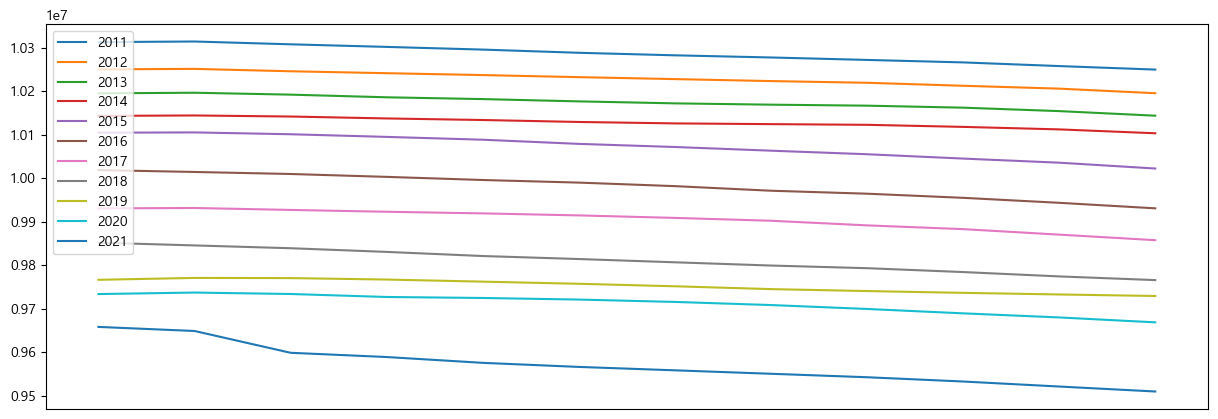

In [53]:
fig = plt.figure(figsize=(15,5))

plt.plot(pop_seo11, label='2011')
plt.plot(pop_seo12, label='2012')
plt.plot(pop_seo13, label='2013')
plt.plot(pop_seo14, label='2014')
plt.plot(pop_seo15, label='2015')
plt.plot(pop_seo16, label='2016')
plt.plot(pop_seo17, label='2017')
plt.plot(pop_seo18, label='2018')
plt.plot(pop_seo19, label='2019')
plt.plot(pop_seo20, label='2020')
plt.plot(pop_seo21, label='2021')

plt.gca().axes.xaxis.set_visible(False) # x값 범위 없애기
plt.legend(loc="upper left")
plt.show()

In [54]:
pop_se = pop_se.iloc[18:]

In [55]:
# coll = ['pop_seo',
# 'pop_bu',
# 'pop_daeg',
# 'pop_in',
# 'pop_gwang',
# 'pop_daej',
# 'pop_ul',
# 'pop_se',
# 'pop_gg',
# 'pop_gw',
# 'pop_ccb',
# 'pop_ccn',
# 'pop_jjb',
# 'pop_jjn',
# 'pop_ggb',
# 'pop_ggn',
# 'pop_je']

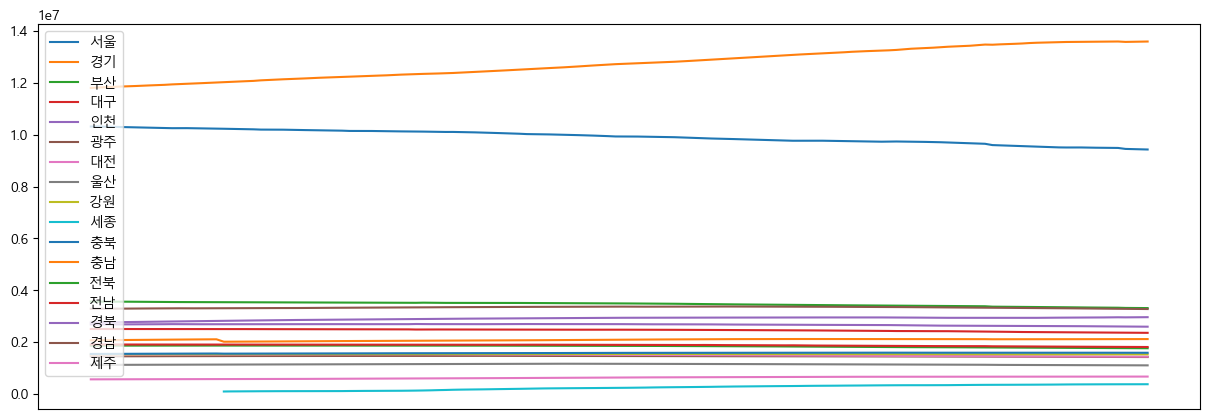

In [56]:
fig = plt.figure(figsize=(15,5))

plt.plot(pop_seo, label='서울')
plt.plot(pop_gg, label='경기')
plt.plot(pop_bu, label='부산')
plt.plot(pop_daeg, label='대구')
plt.plot(pop_in, label='인천')
plt.plot(pop_gwang, label='광주')
plt.plot(pop_daej, label='대전')
plt.plot(pop_ul, label='울산')
plt.plot(pop_gw, label='강원')
plt.plot(pop_se, label='세종')
plt.plot(pop_ccb, label='충북')
plt.plot(pop_ccn, label='충남')
plt.plot(pop_jjb, label='전북')
plt.plot(pop_jjn, label='전남')
plt.plot(pop_ggb, label='경북')
plt.plot(pop_ggn, label='경남')
plt.plot(pop_je, label='제주')

plt.gca().axes.xaxis.set_visible(False) # x값 범위 없애기
plt.legend(loc="upper left")
plt.show()

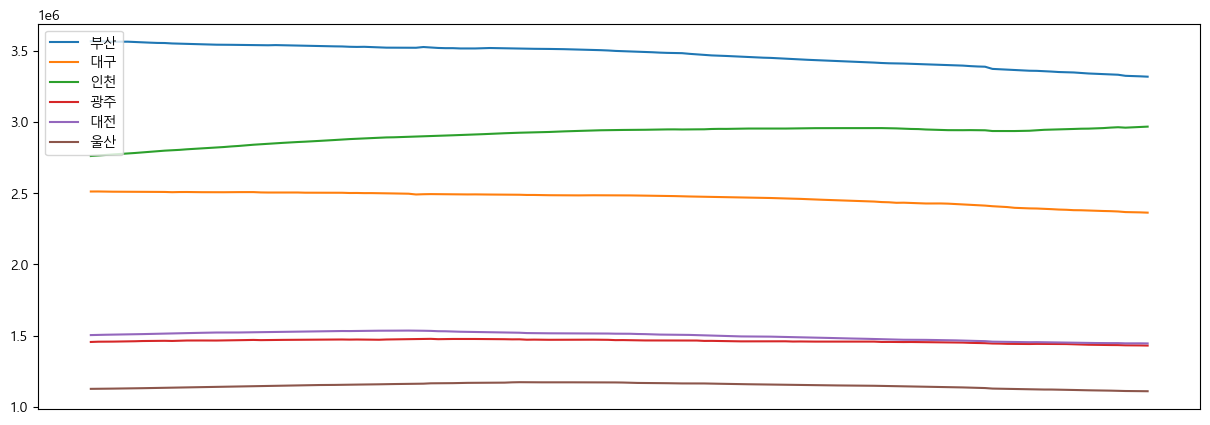

In [57]:
fig = plt.figure(figsize=(15,5))

plt.plot(pop_bu, label='부산')
plt.plot(pop_daeg, label='대구')
plt.plot(pop_in, label='인천')
plt.plot(pop_gwang, label='광주')
plt.plot(pop_daej, label='대전')
plt.plot(pop_ul, label='울산')

plt.gca().axes.xaxis.set_visible(False) # x값 범위 없애기
plt.legend(loc="upper left")
plt.show()

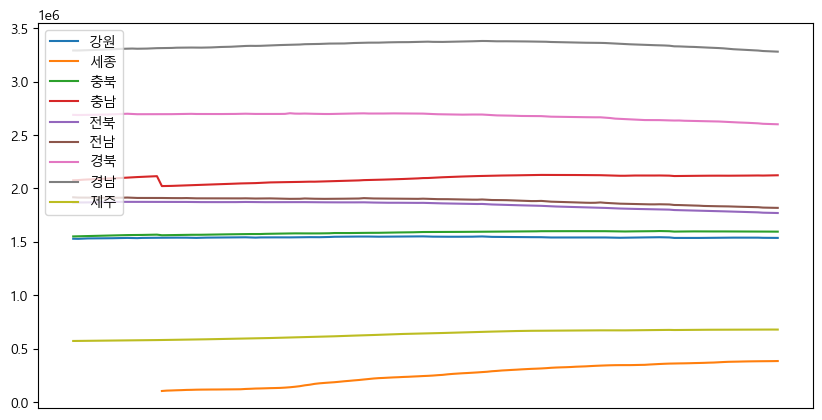

In [58]:
fig = plt.figure(figsize=(10,5))

plt.plot(pop_gw, label='강원')
plt.plot(pop_se, label='세종')
plt.plot(pop_ccb, label='충북')
plt.plot(pop_ccn, label='충남')
plt.plot(pop_jjb, label='전북')
plt.plot(pop_jjn, label='전남')
plt.plot(pop_ggb, label='경북')
plt.plot(pop_ggn, label='경남')
plt.plot(pop_je, label='제주')

plt.gca().axes.xaxis.set_visible(False) # x값 범위 없애기
plt.legend(loc="upper left")
plt.show()

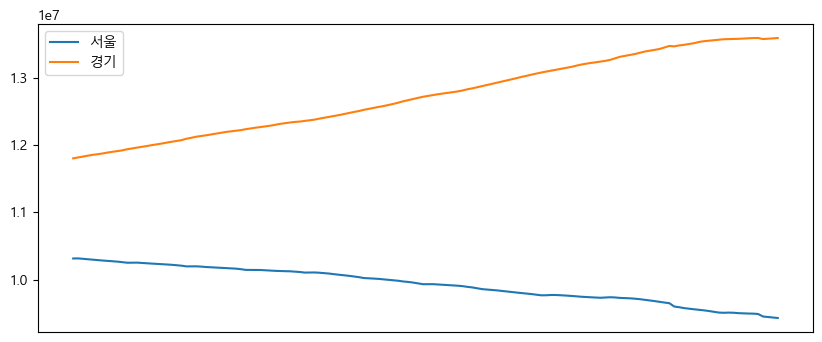

In [59]:
fig = plt.figure(figsize=(10,4))

plt.plot(pop_seo, label='서울')
plt.plot(pop_gg, label='경기')

plt.gca().axes.xaxis.set_visible(False) # x값 범위 없애기
plt.legend(loc="upper left")
plt.show()

In [60]:
pop_con = pop.iloc[:,0].to_frame()

In [61]:
pop_con

,전국
2011.01,50534731
2011.02,50555262
2011.03,50575130
2011.04,50594424
2011.05,50613213
...,...
2022.08,51558441
2022.09,51466658
2022.10,51459626
2022.11,51450829


In [62]:
pop_con.loc['2022.01':'2022.12']

,전국
2022.01,51632473
2022.02,51625561
2022.03,51610695
2022.04,51592660
2022.05,51583722
2022.06,51578178
2022.07,51574446
2022.08,51558441
2022.09,51466658
2022.10,51459626


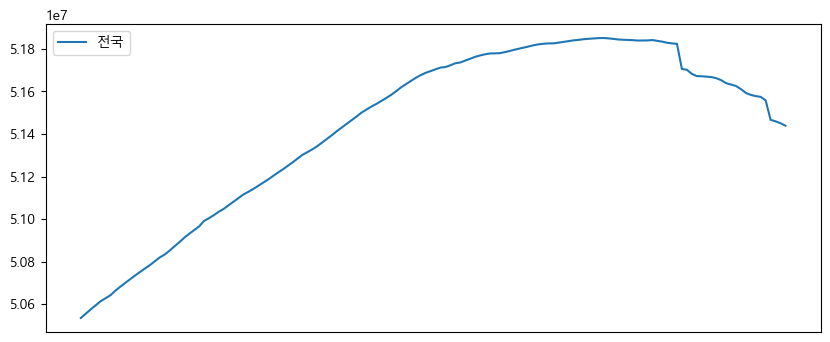

In [63]:
fig = plt.figure(figsize=(10,4))

plt.plot(pop_con, label='전국')

plt.gca().axes.xaxis.set_visible(False) # x값 범위 없애기
plt.legend(loc="upper left")
plt.show()

In [64]:
pop_con18 = pop_con.loc['2018.01':'2018.12']
pop_con19 = pop_con.loc['2019.01':'2019.12']
pop_con20 = pop_con.loc['2020.01':'2020.12']
pop_con21 = pop_con.loc['2021.01':'2021.12']
pop_con22 = pop_con.loc['2022.01':'2022.12']

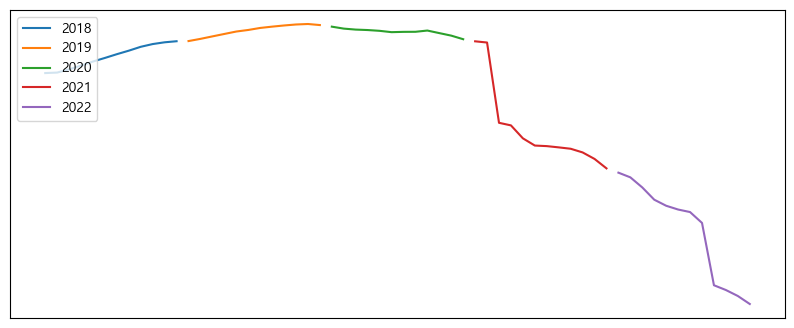

In [65]:
fig = plt.figure(figsize=(10,4))

plt.plot(pop_con18, label='2018')
plt.plot(pop_con19, label='2019')
plt.plot(pop_con20, label='2020')
plt.plot(pop_con21, label='2021')
plt.plot(pop_con22, label='2022')

plt.gca().axes.xaxis.set_visible(False) # x값 범위 없애기
plt.gca().axes.yaxis.set_visible(False)
plt.legend(loc="upper left")
plt.show()

In [66]:
# ~2019.11 총인구수 (+)
# 2019.12~~ 2020년 총인구수 감소 시작 (-)
# 2021.03~ 급격한 총인구수 감소 추세 (--)

## [인구-전력데이터 시각화]

#### 1. 전력데이터 전처리

In [67]:
ele = pd.read_csv('data/ElectricityUsage/전력 사용량 10차.csv')

In [68]:
ele.head(2)

,Unnamed: 0,연도,시도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,0,2010,강원도,1480180,1382020,1308429,1317499,1185530,1114450,1055938,1088438,1058865,1116695,1297575,1442404
1,1,2010,경기도,8725482,8341902,7574084,7727001,7156767,7152029,7589292,7961584,7659696,6868326,7866013,8452695


In [69]:
ele['연도'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021], dtype=int64)

In [70]:
ele = ele.drop(columns='Unnamed: 0')

In [71]:
ele_11 = ele[ele['연도'] == 2011 ].drop(columns=['연도','시도'])

In [72]:
ele_11

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
17,1582163,1520498,1420666,1361937,1245617,1184828,1144760,1176803,1180929,1242326,1331481,1484037
18,9555286,8918913,8206234,7992730,7414139,7452141,7828198,8077684,7742435,7370838,7768998,8516923
19,3190181,2931864,2874490,2770642,2557899,2584721,2690200,2671624,2591648,2548905,2672113,2986919
20,4066080,3684612,3779253,3721268,3610096,3545546,3581232,3576061,3495235,3613546,3668855,3825516
21,757197,717292,672951,669154,615840,626417,674555,712046,673056,618928,635724,674224
22,1418812,1336667,1234507,1216588,1126409,1163368,1243303,1286641,1211616,1125749,1176821,1281465
23,877248,825822,757165,739750,685169,710217,764457,816201,749635,673068,698819,762226
24,1976059,1837733,1704632,1709300,1560035,1613264,1695590,1793742,1698380,1596236,1625214,1751788
25,4562632,4264449,3736362,3682652,3425703,3713716,4049595,4433093,4149017,3458466,3527460,3899848
26,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
col_month = ele_11.columns.to_list()
mon_sum = []

In [74]:
for i in col_month :
    item = ele_11[i].sum()
    mon_sum.append(item)

In [75]:
len(mon_sum)

12

In [76]:
ele_12 = ele[ele['연도'] == 2012 ].drop(columns=['연도','시도'])
ele_13 = ele[ele['연도'] == 2013 ].drop(columns=['연도','시도'])
ele_14 = ele[ele['연도'] == 2014 ].drop(columns=['연도','시도'])
ele_15 = ele[ele['연도'] == 2015 ].drop(columns=['연도','시도'])
ele_16 = ele[ele['연도'] == 2016 ].drop(columns=['연도','시도'])
ele_17 = ele[ele['연도'] == 2017 ].drop(columns=['연도','시도'])
ele_18 = ele[ele['연도'] == 2018 ].drop(columns=['연도','시도'])
ele_19 = ele[ele['연도'] == 2019 ].drop(columns=['연도','시도'])
ele_20 = ele[ele['연도'] == 2020 ].drop(columns=['연도','시도'])
ele_21 = ele[ele['연도'] == 2021 ].drop(columns=['연도','시도'])

In [77]:
for i in col_month :
    item = ele_12[i].sum()
    mon_sum.append(item)

In [78]:
for i in col_month :
    item = ele_13[i].sum()
    mon_sum.append(item)

In [79]:
for i in col_month :
    item = ele_14[i].sum()
    mon_sum.append(item)

In [80]:
for i in col_month :
    item = ele_15[i].sum()
    mon_sum.append(item)

In [81]:
for i in col_month :
    item = ele_16[i].sum()
    mon_sum.append(item)

In [82]:
for i in col_month :
    item = ele_17[i].sum()
    mon_sum.append(item)

In [83]:
for i in col_month :
    item = ele_18[i].sum()
    mon_sum.append(item)

In [84]:
for i in col_month :
    item = ele_19[i].sum()
    mon_sum.append(item)

In [85]:
for i in col_month :
    item = ele_20[i].sum()
    mon_sum.append(item)

In [86]:
for i in col_month :
    item = ele_21[i].sum()
    mon_sum.append(item)

In [87]:
len(mon_sum)

132

In [88]:
mon_sum11 = mon_sum[:12]
mon_sum12 = mon_sum[12:24]
mon_sum13 = mon_sum[24:36]
mon_sum14 = mon_sum[36:48]
mon_sum15 = mon_sum[48:60]
mon_sum16 = mon_sum[60:72]
mon_sum17 = mon_sum[72:84]
mon_sum18 = mon_sum[84:96]
mon_sum19 = mon_sum[96:108]
mon_sum20 = mon_sum[108:120]
mon_sum21 = mon_sum[120:132]

In [89]:
ele_year = pd.DataFrame([mon_sum11, mon_sum12, mon_sum13, mon_sum14, mon_sum15, mon_sum16, 
                         mon_sum17, mon_sum18, mon_sum19, mon_sum20, mon_sum21],
                       columns = col_month)
ele_year

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,43099078,39832832,38433627,37716270,35454434,35747228,37283762,38360182,36859463,35603320,36867459,39653643
1,42469665,41915749,40308113,38484369,36375701,36596911,38134463,39886094,37868366,34894616,37916136,41564408
2,44472409,40996391,39504322,39004550,37459817,37365841,39171380,40647053,38781002,36946382,38520886,41875139
3,43758414,41207069,40622001,39253853,37377627,37842234,39994984,40032780,38161493,37815461,38728846,42618829
4,45423302,41808546,40859792,40064243,37875990,38330610,39378498,41928986,39704090,37451090,38863526,41775596
5,44630416,43570225,42245182,40123456,38235590,39668106,40590292,44411840,41203912,38549180,40256467,43533758
6,45196955,44422398,42558537,40811060,38743897,39672663,43208493,45353733,42336070,38368790,41293098,45780535
7,48361692,46749787,42936271,42032511,40530471,41045644,44029951,49532098,43729034,39977476,41905129,45317349
8,48644384,44353586,43088673,42440604,40708005,40619810,42966183,47558432,43649290,40622819,41111567,44731595
9,46326904,44498361,42870599,40475197,38327621,39752888,42067769,44599215,45110793,39065311,41146120,45027083


In [90]:
ele_year = ele_year.transpose()

In [91]:
ele_year.columns = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']

In [92]:
ele_year

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1월,43099078,42469665,44472409,43758414,45423302,44630416,45196955,48361692,48644384,46326904,48755561
2월,39832832,41915749,40996391,41207069,41808546,43570225,44422398,46749787,44353586,44498361,45187960
3월,38433627,40308113,39504322,40622001,40859792,42245182,42558537,42936271,43088673,42870599,43074365
4월,37716270,38484369,39004550,39253853,40064243,40123456,40811060,42032511,42440604,40475197,41899676
5월,35454434,36375701,37459817,37377627,37875990,38235590,38743897,40530471,40708005,38327621,40842275
6월,35747228,36596911,37365841,37842234,38330610,39668106,39672663,41045644,40619810,39752888,42031875
7월,37283762,38134463,39171380,39994984,39378498,40590292,43208493,44029951,42966183,42067769,45971796
8월,38360182,39886094,40647053,40032780,41928986,44411840,45353733,49532098,47558432,44599215,48929956
9월,36859463,37868366,38781002,38161493,39704090,41203912,42336070,43729034,43649290,45110793,44818884
10월,35603320,34894616,36946382,37815461,37451090,38549180,38368790,39977476,40622819,39065311,41838223


#### 2. 전력데이터 추이

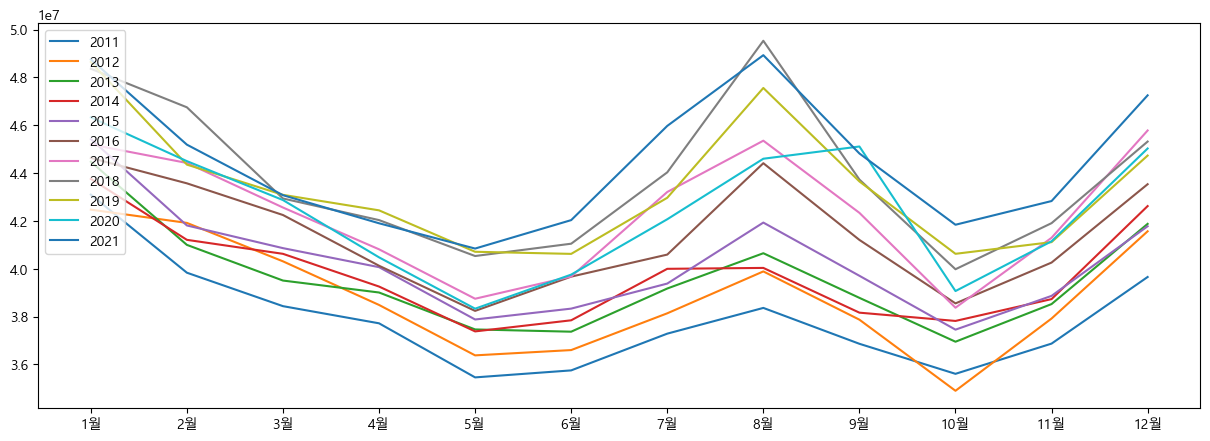

In [93]:
fig = plt.figure(figsize=(15,5))

plt.plot(ele_year['2011'], label='2011')
plt.plot(ele_year['2012'], label='2012')
plt.plot(ele_year['2013'], label='2013')
plt.plot(ele_year['2014'], label='2014')
plt.plot(ele_year['2015'], label='2015')
plt.plot(ele_year['2016'], label='2016')
plt.plot(ele_year['2017'], label='2017')
plt.plot(ele_year['2018'], label='2018')
plt.plot(ele_year['2019'], label='2019')
plt.plot(ele_year['2020'], label='2020')
plt.plot(ele_year['2021'], label='2021')

plt.legend(loc="upper left")
plt.show()

#### 3. 인구-전력데이터 추이

In [94]:
pop_21 = pop[['전국']].loc['2021.01':'2021.12']
pop_20 = pop[['전국']].loc['2020.01':'2020.12']
pop_19 = pop[['전국']].loc['2019.01':'2019.12']
pop_18 = pop[['전국']].loc['2018.01':'2018.12']

In [95]:
pop_21.set_axis(col_month,axis='index',inplace=True)
pop_20.set_axis(col_month,axis='index',inplace=True)
pop_19.set_axis(col_month,axis='index',inplace=True)
pop_18.set_axis(col_month,axis='index',inplace=True)

In [96]:
# 2019년 11월 최고인구수
pop_19

,전국
1월,51826287
2월,51829538
3월,51833175
4월,51836763
5월,51840339
6월,51842636
7월,51845612
8월,51847538
9월,51849253
10월,51850705


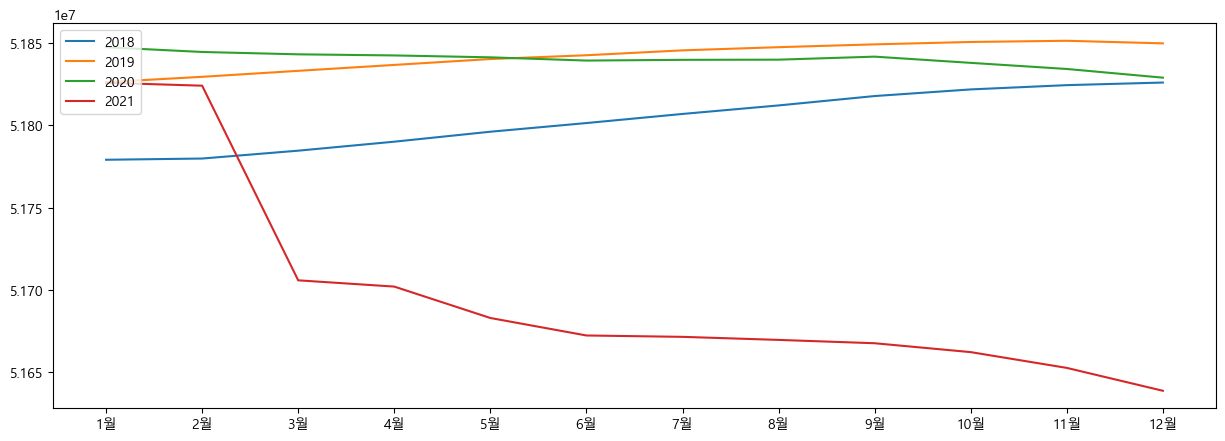

In [97]:
fig = plt.figure(figsize=(15,5))

plt.plot(pop_18, label='2018')
plt.plot(pop_19, label='2019')
plt.plot(pop_20, label='2020')
plt.plot(pop_21, label='2021')

plt.legend(loc="upper left")
plt.show()

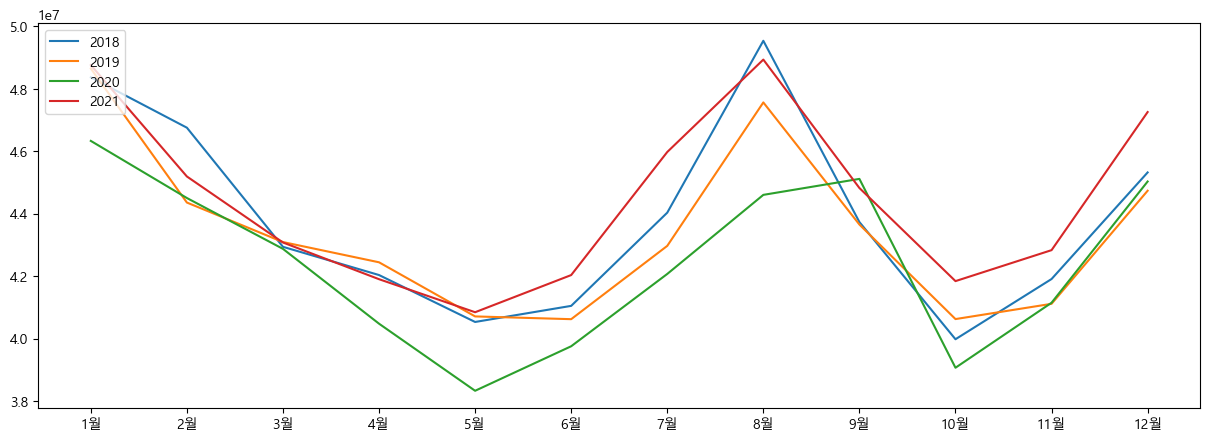

In [98]:
fig = plt.figure(figsize=(15,5))

# plt.plot(pop_21, label='인구수')
plt.plot(ele_year['2018'], label='2018')
plt.plot(ele_year['2019'], label='2019')
plt.plot(ele_year['2020'], label='2020')
plt.plot(ele_year['2021'], label='2021')

plt.legend(loc="upper left")
plt.show()

In [99]:
# 전력데이터 2018~2021 연도별 총량 확인

In [100]:
ele_year['2018'].sum(),ele_year['2019'].sum(),ele_year['2020'].sum(),ele_year['2021'].sum()

(526147413, 520494948, 509267861, 533430807)

In [101]:
# 전력데이터 2014~2017 연도별 총량 확인

In [102]:
ele_year['2014'].sum(),ele_year['2015'].sum(),ele_year['2016'].sum(),ele_year['2017'].sum()

(477413591, 483464269, 497018424, 507746229)

In [103]:
# >> 거시적으로 인구수가 증가하는 구간에서 연간 전력량이 증가하는 경향을 보이나
# >> 인구수 최고점인 2019년을 비교하면 , 2019년 전력사용량 < 2018년 전력사용량을 보임
# >> 인구가 급감하는 2020~2021년은 코로나 변수때문에 연관짓기 쉽지 않음
# >> (코로나는 2020.01.20~ 부터 국내환자 start)

In [104]:
pop[['전국']].loc['2011.01':'2018.12']

,전국
2011.01,50534731
2011.02,50555262
2011.03,50575130
2011.04,50594424
2011.05,50613213
...,...
2018.08,51812153
2018.09,51817851
2018.10,51821881
2018.11,51824477


In [105]:
pop_con_1118 = pop[['전국']].loc['2011.01':'2018.12']

In [106]:
col_month2 = pop_con_1118.index.to_list()

In [107]:
ele_year

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1월,43099078,42469665,44472409,43758414,45423302,44630416,45196955,48361692,48644384,46326904,48755561
2월,39832832,41915749,40996391,41207069,41808546,43570225,44422398,46749787,44353586,44498361,45187960
3월,38433627,40308113,39504322,40622001,40859792,42245182,42558537,42936271,43088673,42870599,43074365
4월,37716270,38484369,39004550,39253853,40064243,40123456,40811060,42032511,42440604,40475197,41899676
5월,35454434,36375701,37459817,37377627,37875990,38235590,38743897,40530471,40708005,38327621,40842275
6월,35747228,36596911,37365841,37842234,38330610,39668106,39672663,41045644,40619810,39752888,42031875
7월,37283762,38134463,39171380,39994984,39378498,40590292,43208493,44029951,42966183,42067769,45971796
8월,38360182,39886094,40647053,40032780,41928986,44411840,45353733,49532098,47558432,44599215,48929956
9월,36859463,37868366,38781002,38161493,39704090,41203912,42336070,43729034,43649290,45110793,44818884
10월,35603320,34894616,36946382,37815461,37451090,38549180,38368790,39977476,40622819,39065311,41838223


In [108]:
ele_year_1118 = pd.concat([ele_year['2011'],ele_year['2012'],ele_year['2013'],ele_year['2014'],
                           ele_year['2015'],ele_year['2016'],ele_year['2017'],ele_year['2018']],ignore_index=True)

In [109]:
ele_year_1118 = ele_year_1118.to_frame()

In [110]:
ele_year_1118

,0
0,43099078
1,39832832
2,38433627
3,37716270
4,35454434
...,...
91,49532098
92,43729034
93,39977476
94,41905129


In [111]:
ele_year_1118.set_axis(col_month2, axis='index',inplace=True)

In [112]:
ele_year_1118.columns=['전국']

In [113]:
ele_year_1118

,전국
2011.01,43099078
2011.02,39832832
2011.03,38433627
2011.04,37716270
2011.05,35454434
...,...
2018.08,49532098
2018.09,43729034
2018.10,39977476
2018.11,41905129


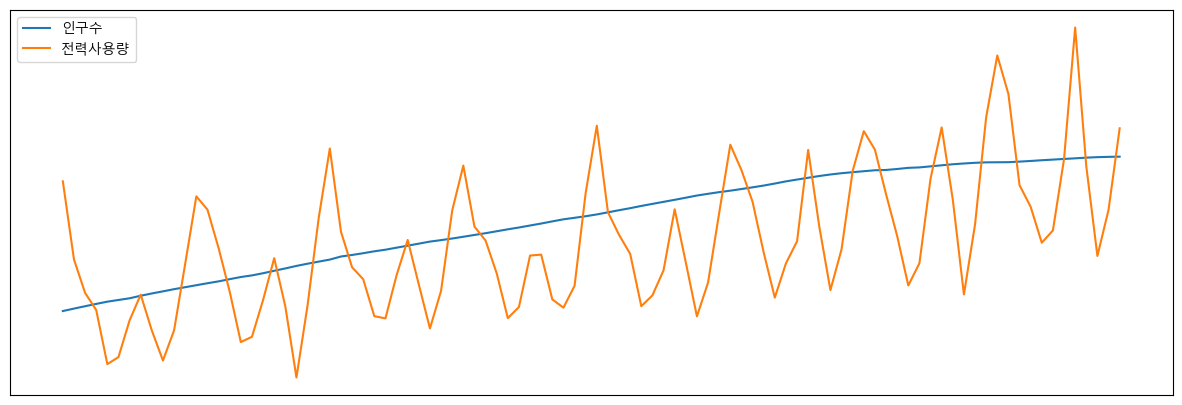

In [114]:
fig = plt.figure(figsize=(15,5))

plt.plot(pop_con_1118*5, label='인구수')
plt.plot(ele_year_1118+215000000, label='전력사용량')

plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.legend(loc="upper left")
plt.show()

## [인구밀도-전력데이터 시각화]

#### 1. 인구밀도 지도

In [116]:
pop_dm = pop.copy()

In [120]:
pop_dm = pop_dm.drop(columns=['전국'])

In [121]:
col_sido = pop_dm.columns.to_list()

In [122]:
col_sido

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [123]:
pop_dm = pop_dm.transpose()

In [124]:
pop_dm['시도'] = col_sido

In [125]:
pop_dm.head(2)

,2011.01,2011.02,2011.03,2011.04,2011.05,2011.06,2011.07,2011.08,2011.09,2011.10,...,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12,시도
서울특별시,10312835,10314245,10307783,10301829,10295643,10288284,10282472,10277507,10271880,10266174,...,9500480,9496887,9494807,9493211,9488454,9450768,9443722,9436836,9428372,서울특별시
부산광역시,3566560,3566480,3564873,3563042,3562985,3563295,3560813,3558372,3556565,3554635,...,3340214,3338167,3336737,3334595,3331444,3323826,3322286,3320276,3317812,부산광역시


In [126]:
map = folium.Map((36.64389,128.48944),zoom_start=7)
folium.Choropleth(geo_data=jsondt,
                  data=pop_dm,
                  columns=['시도','2021.12'],
                  key_on = 'feature.id').add_to(map)
map

#### 2. 인구밀도-전력데이터 시각화 (지역별)